<a href="https://colab.research.google.com/github/Fatih-Boostanci/DS_DeepLearning/blob/master/DL_Assignment_2_(Image_Classification_with_CNN)_Victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [53]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [54]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [55]:
print("There are", len(X_train), "images in the training dataset")
print("There are", len(X_test), "images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [56]:
# Checking the shape of one image
X_train.shape

(60000, 28, 28)

In [57]:
X_train[11].shape

(28, 28)

In [58]:
X_train[11]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  39, 111,  93,  85,  27,   0,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0, 190, 244, 248, 255, 255, 155, 202, 212, 150,   9,   0,   3,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0, 213, 227, 233, 227, 243, 246, 255, 250, 255, 146,   0,   9,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
          6, 244, 233, 236, 244, 232, 214, 248, 242, 251,  33,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   6,   0,
         72, 255, 231, 239, 244, 237, 226, 255, 252, 207,  44,  24,   0,
          2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        125, 231, 215, 253, 252, 234, 246, 254, 239, 128, 114,  63,   0,
          3,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [59]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

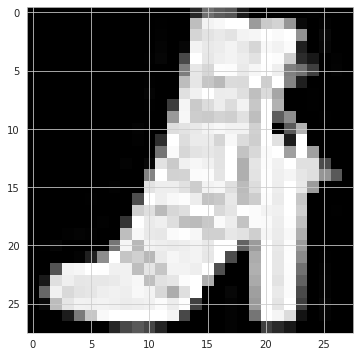

In [60]:
plt.imshow(X_train[11], cmap="gray")

In [61]:
y_train[11]

9

In [62]:
y_train.shape

(60000,)

In [63]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [64]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

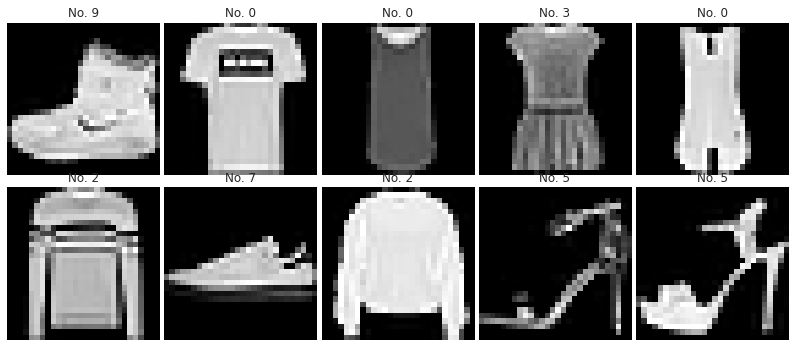

In [65]:
cloth_rows, cloth_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(14, 6), gridspec_kw={"wspace":0.03, "hspace":0.02}, squeeze=True)

for r in range(cloth_rows):
  for c in range(cloth_cols):

    image_index = r * 5 + c
    ax[r, c].axis("off")
    ax[r, c].set_title("No. %d" % y_train[image_index])
    ax[r, c].imshow(X_train[image_index], cmap="gray")

plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [66]:
X_train[7].min(), X_train[7].max()

(0, 255)

In [67]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [68]:
X_train[8].min(), X_train[8].max()

(0.0, 1.0)

In [69]:
X_test[8].min(), X_test[8].max()

(0.0, 0.99607843)

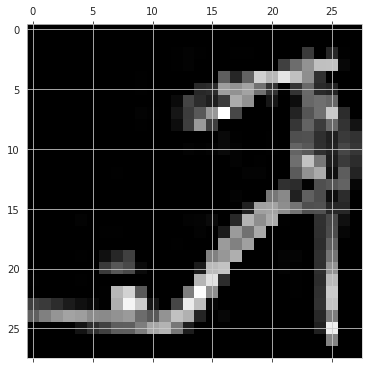

In [70]:
plt.matshow(X_train[8], cmap="gray")

In [71]:
X_train.shape, X_test.shape 

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [72]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [73]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [74]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [75]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [76]:
y_train.shape

(60000,)

In [77]:
y_train[9].shape

()

In [103]:
from tensorflow.keras.utils import to_categorical

In [104]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [105]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [106]:
Y_train[9].shape

(10,)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [107]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [114]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (1,1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 17500)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               2240128   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
____________________________________________

In [116]:
((3 * 3 * 1) + 1) * 28  # Number of  paramaters for the first layer

280

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [117]:
from tensorflow.keras.callbacks import EarlyStopping

In [118]:
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=3, restore_best_weights=True)

In [119]:
model.fit(X_train, Y_train, 
          batch_size=64, 
          epochs=15, 
          validation_data=[X_test, Y_test],
          callbacks=[early_stop])

Epoch 1/15
938/938 [==============================] - 230s 79ms/step - loss: 0.4089 - accuracy: 0.8571 - val_loss: 0.3064 - val_accuracy: 0.8903
Epoch 2/15
938/938 [==============================] - 75s 80ms/step - loss: 0.2574 - accuracy: 0.9082 - val_loss: 0.2846 - val_accuracy: 0.8951
Epoch 3/15
938/938 [==============================] - 74s 79ms/step - loss: 0.2100 - accuracy: 0.9236 - val_loss: 0.2757 - val_accuracy: 0.9063
Epoch 4/15
938/938 [==============================] - 75s 80ms/step - loss: 0.1767 - accuracy: 0.9360 - val_loss: 0.2792 - val_accuracy: 0.9053
Epoch 5/15
938/938 [==============================] - 72s 77ms/step - loss: 0.1505 - accuracy: 0.9458 - val_loss: 0.3362 - val_accuracy: 0.8957
Epoch 6/15
938/938 [==============================] - 73s 78ms/step - loss: 0.1299 - accuracy: 0.9530 - val_loss: 0.2703 - val_accuracy: 0.9177
Epoch 7/15
938/938 [==============================] - 72s 77ms/step - loss: 0.1108 - accuracy: 0.9609 - val_loss: 0.2969 - val_accuracy

**TASK 7: Plot values of metrics you used in your model.**

In [121]:
model.metrics_names

['loss', 'accuracy']

In [122]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.409,0.857,0.306,0.890
1,0.257,0.908,0.285,0.895
2,0.210,0.924,0.276,0.906
3,0.177,0.936,0.279,0.905
4,0.150,0.946,0.336,0.896


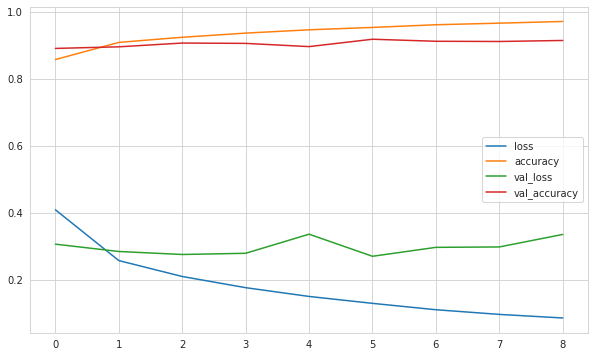

In [124]:
summary.plot();

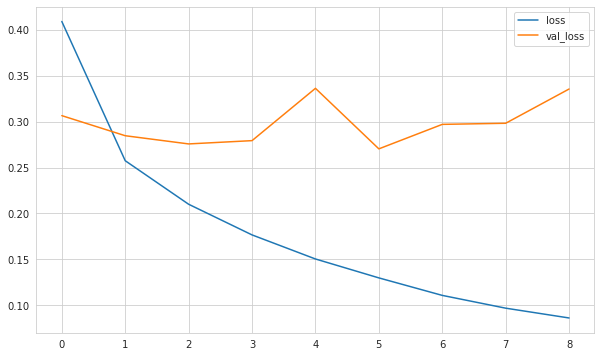

In [125]:
summary[["loss", "val_loss"]].plot();

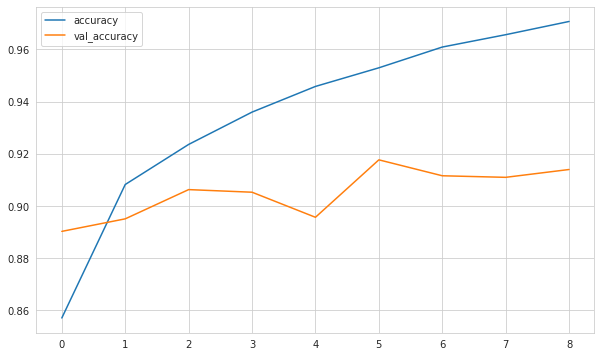

In [126]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [127]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [128]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2703 - accuracy: 0.9177


[0.2702851891517639, 0.9176999926567078]

In [129]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2702851891517639
Test accuracy: 0.9176999926567078


In [130]:
pred_prob = model.predict(X_test)
pred_prob

array([[9.0488228e-08, 1.8858092e-12, 7.6279250e-09, ..., 9.7743323e-05,
        1.4151189e-08, 9.9980170e-01],
       [6.8708312e-07, 3.8230377e-16, 9.9999666e-01, ..., 4.9305186e-15,
        2.3661944e-11, 9.6811177e-13],
       [4.5960014e-11, 1.0000000e+00, 3.8187545e-14, ..., 4.4300494e-23,
        1.7104084e-14, 7.7807718e-21],
       ...,
       [8.9211287e-09, 5.7219622e-16, 5.6421965e-09, ..., 1.8374673e-09,
        1.0000000e+00, 3.5724789e-12],
       [4.6245116e-10, 1.0000000e+00, 1.0220074e-11, ..., 2.0922212e-18,
        3.4655235e-13, 8.2958990e-14],
       [4.3059769e-04, 1.0343942e-06, 2.9006738e-03, ..., 8.5861258e-02,
        3.7432730e-03, 1.2519360e-02]], dtype=float32)

In [131]:
pred_prob.shape

(10000, 10)

In [132]:
pred_prob[0]

array([9.0488228e-08, 1.8858092e-12, 7.6279250e-09, 2.9207109e-11,
       1.0186708e-09, 1.0043045e-04, 8.5666322e-08, 9.7743323e-05,
       1.4151189e-08, 9.9980170e-01], dtype=float32)

In [133]:
np.argmax(pred_prob[0])

9

In [134]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [135]:
y_pred.shape

(10000,)

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.87      0.86      1000
           3       0.91      0.94      0.92      1000
           4       0.87      0.89      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.75      0.76      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [137]:
print(confusion_matrix(y_test, y_pred))

[[865   1  27  13   4   1  84   0   5   0]
 [  3 976   1  12   4   0   2   0   2   0]
 [ 11   0 873   8  60   0  48   0   0   0]
 [  5   3   8 938  15   0  31   0   0   0]
 [  1   1  43  25 885   0  45   0   0   0]
 [  0   0   0   0   0 981   0  10   0   9]
 [ 88   1  78  26  54   0 749   0   4   0]
 [  0   0   0   0   0  11   0 973   0  16]
 [  2   0   4   9   0   4   7   3 970   1]
 [  0   0   0   0   0   4   1  28   0 967]]


In [138]:
print(confusion_matrix(y_test, y_pred))

[[865   1  27  13   4   1  84   0   5   0]
 [  3 976   1  12   4   0   2   0   2   0]
 [ 11   0 873   8  60   0  48   0   0   0]
 [  5   3   8 938  15   0  31   0   0   0]
 [  1   1  43  25 885   0  45   0   0   0]
 [  0   0   0   0   0 981   0  10   0   9]
 [ 88   1  78  26  54   0 749   0   4   0]
 [  0   0   0   0   0  11   0 973   0  16]
 [  2   0   4   9   0   4   7   3 970   1]
 [  0   0   0   0   0   4   1  28   0 967]]


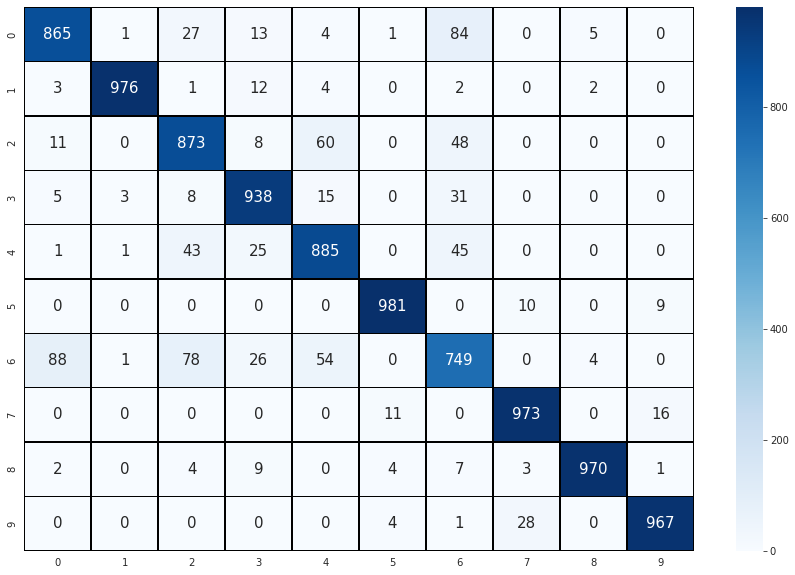

In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15});

In [141]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [142]:
(y_test != y_pred).sum()

823

## Prediction

In [147]:
my_cloth = X_test[9]

In [148]:
my_cloth.shape

(28, 28, 1)

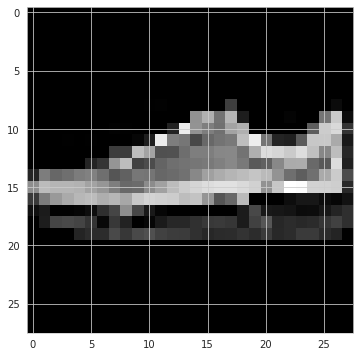

In [149]:
plt.imshow(my_cloth.reshape(28,28), cmap="gray");

In [150]:
y_pred = np.argmax(pred_prob)
y_pred

21

In [151]:
model.save("cnn-cloth_classification.h5")

In [153]:
model = tf.keras.models.load_model("cnn-cloth_classification.h5")

In [156]:
pred = model.predict(np.expand_dims(X_test[35], axis=0))

In [157]:
np.argmax(pred)

0

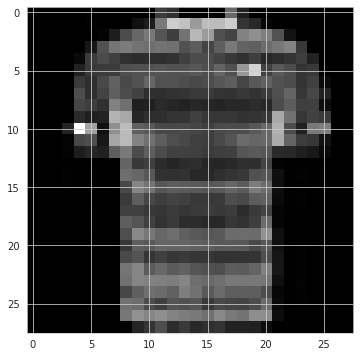

In [160]:
plt.imshow(X_test[35].reshape(28,28), cmap="gray");

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___